# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [21]:
# Dependencies
import csv
import random
import requests
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
from api_keys import weather_api_key

cities = []

# Read all city data and save to cities
with open("worldcities.csv", newline='') as csvfile:
     reader = csv.DictReader(csvfile)
     for row in reader:
        cities.append(row)

## Generate Cities List

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [2]:
# Set up lists to hold reponse info
city_responses = []
picked_indexes = []

# Loop through the list of cities and perform a request for data on each
while len(picked_indexes) < 500:
    n = random.randint(0,len(cities))
    if n not in picked_indexes:
        url = "http://api.openweathermap.org/data/2.5/weather?"
        city = cities[n]['City']
    
        # Build query URL
        query_url = url + "appid=" + weather_api_key + "&q=" + city

        # Log response with i & City
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        if weather_json['cod'] != '404':        
            city_responses.append(weather_json)
            
            # Print log of each city as it's being processed
            print(f"Processing city number #{len(picked_indexes)} {cities[n]['City']} : {weather_json}.")
            picked_indexes.append(n)
            

Processing city number #0 fieni : {'coord': {'lon': 25.4167, 'lat': 45.1333}, 'weather': [{'id': 802, 'main': 'Clouds', 'description': 'scattered clouds', 'icon': '03n'}], 'base': 'stations', 'main': {'temp': 286.81, 'feels_like': 286.32, 'temp_min': 285.85, 'temp_max': 286.81, 'pressure': 1021, 'humidity': 80, 'sea_level': 1021, 'grnd_level': 964}, 'visibility': 10000, 'wind': {'speed': 2.4, 'deg': 353, 'gust': 2.14}, 'clouds': {'all': 37}, 'dt': 1655343445, 'sys': {'type': 2, 'id': 2007714, 'country': 'RO', 'sunrise': 1655346631, 'sunset': 1655402852}, 'timezone': 10800, 'id': 678290, 'name': 'Fieni', 'cod': 200}.
Processing city number #1 korla : {'coord': {'lon': 86.1469, 'lat': 41.7597}, 'weather': [{'id': 803, 'main': 'Clouds', 'description': 'broken clouds', 'icon': '04d'}], 'base': 'stations', 'main': {'temp': 304.58, 'feels_like': 302.5, 'temp_min': 304.58, 'temp_max': 304.58, 'pressure': 999, 'humidity': 17, 'sea_level': 999, 'grnd_level': 900}, 'visibility': 10000, 'wind': {

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [13]:
# map the response data to expected city output data format
city_ids = []
city_names = []
lats = []
lons = []
cloudinesses = []
countries = []
dates = []
humids = []
max_temps = []
winds = []

# loop over the response array and collect data into arrays input of DataFrame
for i in range(500):    
    city_ids.append(i)
    city_names.append(city_responses[i]['name'])
    lats.append(city_responses[i]['coord']['lat'])
    lons.append(city_responses[i]['coord']['lon'])
    cloudinesses.append(city_responses[i]['clouds']['all'])
    countries.append(city_responses[i]['sys']['country'])
    dates.append(city_responses[i]['dt'])
    humids.append(city_responses[i]['main']['humidity'])
    max_temps.append(city_responses[i]['main']['temp_max'])
    winds.append(city_responses[i]['wind']['speed'])

# # Convert a list of dictionaries into a DataFrame
weather_dict = {
    "City_ID": city_ids,
    "City": city_names,
    "Cloudiness": cloudinesses,
    "Country": countries,
    "Date": dates,
    "Humidity": humids,
    "Lat": lats,
    "Lng": lons,
    "Max Temp": max_temps,
    "Wind Speed": winds
}

weather_data = pd.DataFrame(weather_dict)

# Export the DataFrame into a .csv
weather_data.to_csv("../output_data/cities.csv", index=False)

# Display the DataFrame
weather_data

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Fieni,37,RO,1655343445,80,45.1333,25.4167,286.81,2.40
1,1,Korla,61,CN,1655343147,17,41.7597,86.1469,304.58,7.44
2,2,Puttūr,100,IN,1655343163,92,12.7667,75.2167,297.21,0.76
3,3,Igmaya-an,100,PH,1655343446,71,10.5499,123.2206,299.96,2.06
4,4,Sandanski,13,BG,1655343446,79,41.5667,23.2833,288.66,1.52
...,...,...,...,...,...,...,...,...,...,...
495,495,Bend,0,US,1655343577,38,44.0582,-121.3153,294.41,6.69
496,496,Palín,100,GT,1655343577,96,14.4056,-90.6983,295.36,1.67
497,497,Tömörkény,8,HU,1655343578,79,46.6172,20.0436,288.24,1.08
498,498,Krasnogvardeyskiy,8,RU,1655343578,83,57.3793,62.3195,289.79,1.35


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [14]:
# Read the output data file 
data_file = "../output_data/cities.csv"
dataframe = pd.read_csv(data_file)
dataframe.loc[dataframe["Humidity"] > 100]

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed


In [15]:
#  Get the indices of cities that have humidity over 100%.
outliers = dataframe.loc[dataframe["Humidity"] > 100]["City_ID"]

In [16]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = dataframe.loc[~dataframe["City_ID"].isin(outliers)]
clean_city_data

,City_ID,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Fieni,37,RO,1655343445,80,45.1333,25.4167,286.81,2.40
1,1,Korla,61,CN,1655343147,17,41.7597,86.1469,304.58,7.44
2,2,Puttūr,100,IN,1655343163,92,12.7667,75.2167,297.21,0.76
3,3,Igmaya-an,100,PH,1655343446,71,10.5499,123.2206,299.96,2.06
4,4,Sandanski,13,BG,1655343446,79,41.5667,23.2833,288.66,1.52
...,...,...,...,...,...,...,...,...,...,...
495,495,Bend,0,US,1655343577,38,44.0582,-121.3153,294.41,6.69
496,496,Palín,100,GT,1655343577,96,14.4056,-90.6983,295.36,1.67
497,497,Tömörkény,8,HU,1655343578,79,46.6172,20.0436,288.24,1.08
498,498,Krasnogvardeyskiy,8,RU,1655343578,83,57.3793,62.3195,289.79,1.35


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [11]:
def generateScatterPlot(x_axis, data, xlabel, ylabel):
  plt.scatter(x_axis, data)
  title = xlabel + ' vs ' + ylabel + ' Plot'
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)

  # Show the graph that we have created

  plt.show()
  plt.savefig('../output_data/' + title + '.png')

## Latitude vs. Temperature Plot

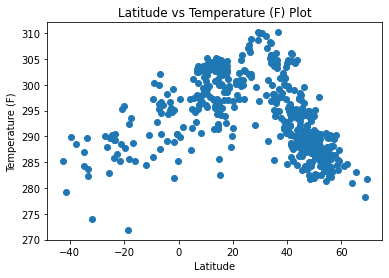

<Figure size 432x288 with 0 Axes>

In [17]:
generateScatterPlot(clean_city_data["Lat"], clean_city_data["Max Temp"],"Latitude","Temperature (F)")

## Latitude vs. Humidity Plot

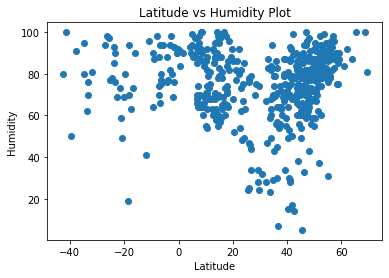

<Figure size 432x288 with 0 Axes>

In [18]:
generateScatterPlot(clean_city_data["Lat"], clean_city_data["Humidity"],"Latitude","Humidity")

## Latitude vs. Cloudiness Plot

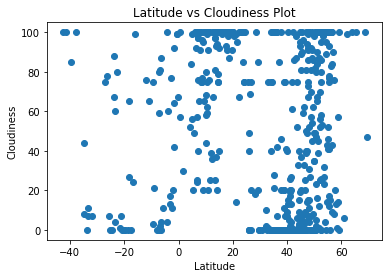

<Figure size 432x288 with 0 Axes>

In [19]:
generateScatterPlot(clean_city_data["Lat"], clean_city_data["Cloudiness"],"Latitude","Cloudiness")

## Latitude vs. Wind Speed Plot

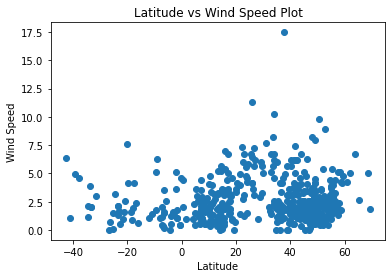

<Figure size 432x288 with 0 Axes>

In [20]:
generateScatterPlot(clean_city_data["Lat"], clean_city_data["Wind Speed"],"Latitude","Wind Speed")

## Linear Regression

In [22]:
# split city data into southern and northern hemisphere 
southern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] < 0]
northern_hemisphere = clean_city_data.loc[clean_city_data["Lat"] >= 0]

#create a function for regresion of x and y for later calling 

def create_regression(x,y,title,xlabel,ylabel):
  coef = np.polyfit(x,y,1)
  poly1d_fn = np.poly1d(coef) 
  plt.title(title)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.plot(x,y, 'yo', x, poly1d_fn(x), '--k') #'--k'=black dashed line, 'yo' = yellow circle marker
  plt.savefig('../output_data/' + title + ' Regression.png')

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

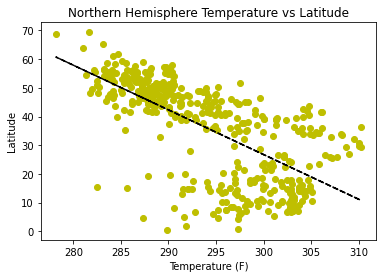

In [23]:
create_regression(northern_hemisphere["Max Temp"],northern_hemisphere["Lat"],"Northern Hemisphere Temperature vs Latitude","Temperature (F)","Latitude")

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

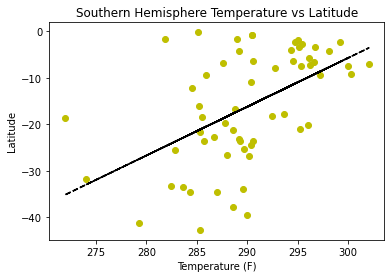

In [24]:
create_regression(southern_hemisphere["Max Temp"],southern_hemisphere["Lat"],"Southern Hemisphere Temperature vs Latitude","Temperature (F)","Latitude")

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

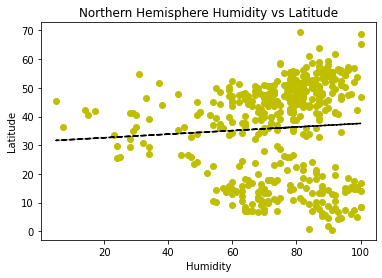

In [25]:
create_regression(northern_hemisphere["Humidity"],northern_hemisphere["Lat"],"Northern Hemisphere Humidity vs Latitude","Humidity","Latitude")

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

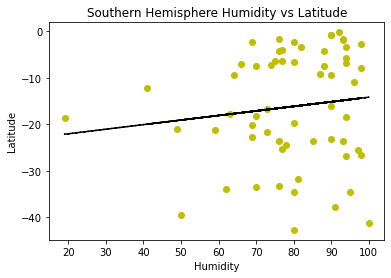

In [26]:
create_regression(southern_hemisphere["Humidity"],southern_hemisphere["Lat"],"Southern Hemisphere Humidity vs Latitude","Humidity","Latitude")

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

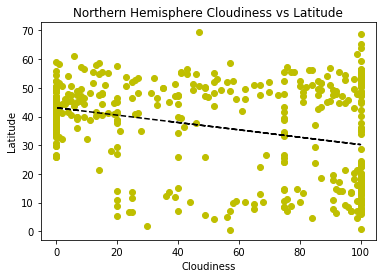

In [27]:
create_regression(northern_hemisphere["Cloudiness"],northern_hemisphere["Lat"],"Northern Hemisphere Cloudiness vs Latitude","Cloudiness","Latitude")

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

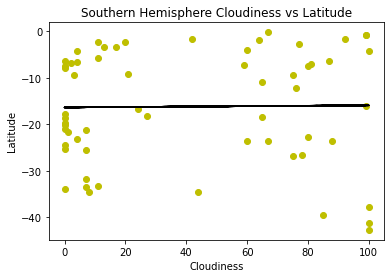

In [28]:
create_regression(southern_hemisphere["Cloudiness"],southern_hemisphere["Lat"],"Southern Hemisphere Cloudiness vs Latitude","Cloudiness","Latitude")

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

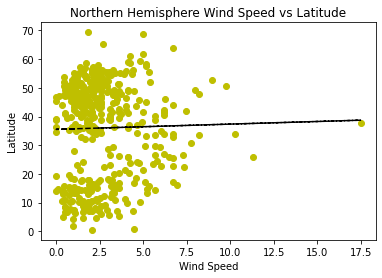

In [29]:
create_regression(northern_hemisphere["Wind Speed"],northern_hemisphere["Lat"],"Northern Hemisphere Wind Speed vs Latitude","Wind Speed","Latitude")

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

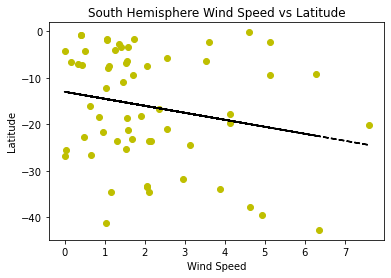

In [30]:
create_regression(southern_hemisphere["Wind Speed"],southern_hemisphere["Lat"], "South Hemisphere Wind Speed vs Latitude","Wind Speed","Latitude" )